In [91]:
import numpy as np
import pandas as pd
import h5py
import tensorflow as tf
import keras
import matplotlib.pyplot as plt

In [92]:
train_ref = h5py.File('datasets/train_signs.h5', 'r')
test_ref = h5py.File('datasets/test_signs.h5', 'r')

In [93]:
list(train_ref.keys())

['list_classes', 'train_set_x', 'train_set_y']

In [94]:
X_train = np.array(train_ref['train_set_x']) / 255.
X_test = np.array(test_ref['test_set_x']) / 255.

y_train = np.array(train_ref['train_set_y'])
y_train = y_train.reshape((y_train.shape[0], 1))

y_test = np.array(test_ref['test_set_y'])
y_test = y_test.reshape((y_test.shape[0], 1))

/home/abdalla/anaconda3/lib/python3.7/site-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


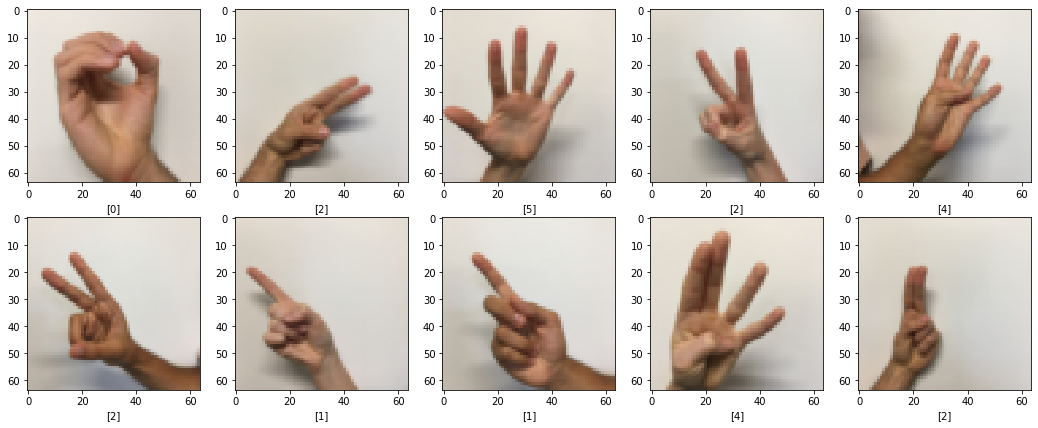

In [95]:
plt.figure(figsize=(18,7))
for i in range(1,11):
    plt.subplot(2,5,i)
    plt.imshow(X_train[i])
    plt.xlabel(y_train[i])


In [96]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), padding='same', activation=keras.activations.relu, input_shape=(64, 64, 3)),
    keras.layers.MaxPool2D((2,2), strides=2),
    keras.layers.Conv2D(64, (3,3), padding='same', activation=keras.activations.relu),
    keras.layers.MaxPool2D((2,2), strides=2),
    keras.layers.Conv2D(128, (3,3), padding='same', activation=keras.activations.relu),
    keras.layers.MaxPool2D((2,2), strides=2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation=keras.activations.relu),
    keras.layers.Dense(6, activation=keras.activations.softmax)
])

In [97]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [98]:
y_train = np.eye(6)[y_train.reshape(-1)]
y_test = np.eye(6)[y_test.reshape(-1)]

In [99]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1080, 64, 64, 3) (1080, 6)
(120, 64, 64, 3) (120, 6)


In [100]:
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
34/34 [==============================] - 4s 96ms/step - loss: 1.8311 - accuracy: 0.1864
Epoch 2/10
34/34 [==============================] - 3s 96ms/step - loss: 1.6048 - accuracy: 0.3441
Epoch 3/10
34/34 [==============================] - 3s 94ms/step - loss: 1.1805 - accuracy: 0.5665
Epoch 4/10
34/34 [==============================] - 3s 98ms/step - loss: 0.7626 - accuracy: 0.7336
Epoch 5/10
34/34 [==============================] - 3s 96ms/step - loss: 0.5319 - accuracy: 0.8126
Epoch 6/10
34/34 [==============================] - 3s 98ms/step - loss: 0.3410 - accuracy: 0.8926
Epoch 7/10
34/34 [==============================] - 3s 95ms/step - loss: 0.2630 - accuracy: 0.9115
Epoch 8/10
34/34 [==============================] - 3s 95ms/step - loss: 0.1547 - accuracy: 0.9524
Epoch 9/10
34/34 [==============================] - 3s 95ms/step - loss: 0.1318 - accuracy: 0.9562
Epoch 10/10
34/34 [==============================] - 3s 95ms/step - loss: 0.0889 - accuracy: 0.9731


In [101]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 22ms/step - loss: 0.2391 - accuracy: 0.9000


[0.23911117017269135, 0.8999999761581421]